In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


PREPROCESSING

checking for null values

In [2]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [3]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.NaN, strategy='mean')

df.Income = imp.fit_transform(df.Income[:,np.newaxis])

/tmp/ipykernel_5629/2046211649.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  df.Income = imp.fit_transform(df.Income[:,np.newaxis])


checking for categorical and numeric cols

In [4]:
cat_cols = list()
num_cols = list()

for col in df.columns:
    if df[col].nunique() < 15:
        cat_cols.append(col)
    else:
        num_cols.append(col)

for col in cat_cols:
    print(f'{col}: {df[col].unique()}')

Education: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Marital_Status: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Kidhome: [0 1 2]
Teenhome: [0 1 2]
NumCatalogPurchases: [10  1  2  0  3  4  6 28  9  5  8  7 11 22]
NumStorePurchases: [ 4  2 10  6  7  0  3  8  5 12  9 13 11  1]
AcceptedCmp3: [0 1]
AcceptedCmp4: [0 1]
AcceptedCmp5: [0 1]
AcceptedCmp1: [0 1]
AcceptedCmp2: [0 1]
Complain: [0 1]
Z_CostContact: [3]
Z_Revenue: [11]
Response: [1 0]


dealing with the date data

In [5]:
df.Dt_Customer = pd.to_datetime(df.Dt_Customer) 
df['year'] = df.Dt_Customer.dt.year
df['month'] = df.Dt_Customer.dt.month
df['day'] = df.Dt_Customer.dt.day 
df = df.drop(['Dt_Customer'],axis=1)
df.head()

/tmp/ipykernel_5629/845441160.py:1: UserWarning: Parsing '21-08-2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.Dt_Customer = pd.to_datetime(df.Dt_Customer)
/tmp/ipykernel_5629/845441160.py:1: UserWarning: Parsing '19-01-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.Dt_Customer = pd.to_datetime(df.Dt_Customer)
/tmp/ipykernel_5629/845441160.py:1: UserWarning: Parsing '13-11-2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.Dt_Customer = pd.to_datetime(df.Dt_Customer)
/tmp/ipykernel_5629/845441160.py:1: UserWarning: Parsing '13-03-2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  df.Dt_Customer = pd.to_datetime(df.Dt_Customer)
/tmp/ipykernel_5629/845441160.py:1: UserWarning: Parsing '15-11-2013' in DD/MM/YYYY format. Provide format or specify infer_

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,year,month,day
0,5524,1957,Graduation,Single,58138.0,0,0,58,635,88,...,0,0,0,0,3,11,1,2012,4,9
1,2174,1954,Graduation,Single,46344.0,1,1,38,11,1,...,0,0,0,0,3,11,0,2014,8,3
2,4141,1965,Graduation,Together,71613.0,0,0,26,426,49,...,0,0,0,0,3,11,0,2013,8,21
3,6182,1984,Graduation,Together,26646.0,1,0,26,11,4,...,0,0,0,0,3,11,0,2014,10,2
4,5324,1981,PhD,Married,58293.0,1,0,94,173,43,...,0,0,0,0,3,11,0,2014,1,19


dealing with the word data

In [6]:
df.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [7]:
df.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder
labeller = LabelEncoder()
df.Education = labeller.fit_transform(df.Education)
df.Marital_Status = labeller.fit_transform(df.Marital_Status)
df.Education.value_counts()

2    1127
4     486
3     370
0     203
1      54
Name: Education, dtype: int64

results after encoding the education column
1. basic
2. graduation
3. master
4. phd
5. 0. 2n cycle 

In [9]:
df.Marital_Status.value_counts()

3    864
5    580
4    480
2    232
6     77
1      3
0      2
7      2
Name: Marital_Status, dtype: int64

labels for marital status
1. alone
2. divorced
3. married
4. single
5. together
6. widow
7. yolo
8. 0. absurd

In [10]:
df1 = df.drop(['Z_Revenue', 'Z_CostContact', 'ID'], axis=1)
df1.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,year,month,day
0,1957,2,4,58138.0,0,0,58,635,88,546,...,0,0,0,0,0,0,1,2012,4,9
1,1954,2,4,46344.0,1,1,38,11,1,6,...,0,0,0,0,0,0,0,2014,8,3
2,1965,2,5,71613.0,0,0,26,426,49,127,...,0,0,0,0,0,0,0,2013,8,21
3,1984,2,5,26646.0,1,0,26,11,4,20,...,0,0,0,0,0,0,0,2014,10,2
4,1981,4,3,58293.0,1,0,94,173,43,118,...,0,0,0,0,0,0,0,2014,1,19


outlier detection

In [11]:
outlier_list = ['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumWebVisitsMonth']
def tukey(df, col):
    Q1 = np.percentile(df[col], 25, axis=0)
    Q3 = np.percentile(df[col], 75, axis=0)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 *IQR
    lower = Q1 - 1.5 *IQR
    return df[(df[col] < upper) | (df[col] > lower)]

In [12]:
for col in outlier_list:
    df1 = tukey(df1, col)

Text(0, 0.5, 'fish products')

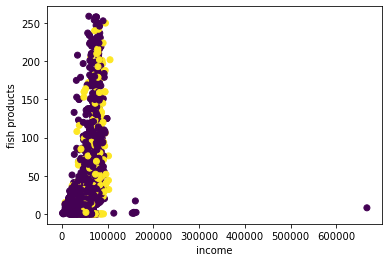

In [13]:
plt.scatter(df1.Income, df1.MntFishProducts, c=df1.Response, cmap='viridis')
plt.xlabel('income')
plt.ylabel('fish products')

Text(0, 0.5, 'fish products')

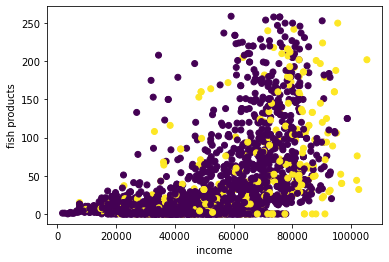

In [14]:
df1 = df1[df1.Income < 110000]
plt.scatter(df1.Income, df1.MntFishProducts, c=df1.Response, cmap='viridis')
plt.xlabel('income')
plt.ylabel('fish products')

In [15]:
sns.pairplot(df1)

/home/derrick-shibero/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Income', ylabel='Density'>

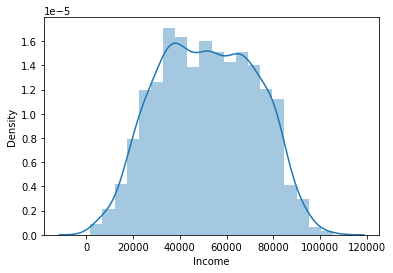

In [16]:
sns.distplot(df1.Income, bins=20)

In [17]:
df1.describe()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,year,month,day
count,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,...,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000,2231.000000
mean,1968.803227,2.390408,3.729269,51612.403869,0.444644,0.507396,49.129090,305.064097,26.391304,165.392201,...,0.073061,0.074854,0.073061,0.064545,0.013447,0.009413,0.149709,2013.027342,6.529359,15.596145
std,11.982435,1.124324,1.076133,20564.364791,0.538605,0.544696,28.946919,336.800944,39.827112,219.423701,...,0.260296,0.263215,0.260296,0.245776,0.115204,0.096584,0.356866,0.684660,3.514214,8.822493
min,1893.000000,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2012.000000,1.000000,1.000000
25%,1959.000000,2.000000,3.000000,35428.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,3.000000,8.000000
50%,1970.000000,2.000000,4.000000,51563.000000,0.000000,0.000000,49.000000,176.000000,8.000000,67.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,6.000000,16.000000
75%,1977.000000,3.000000,5.000000,68117.500000,1.000000,1.000000,74.000000,505.000000,33.000000,231.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.000000,10.000000,23.000000
max,1996.000000,4.000000,7.000000,105471.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2014.000000,12.000000,31.000000


Text(0, 0.5, 'mnt fruits')

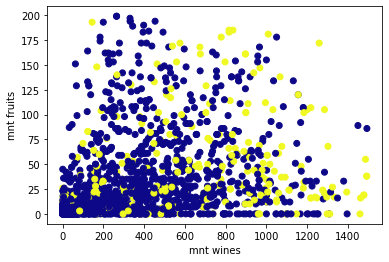

In [18]:
plt.scatter(df1.MntWines, df1.MntFruits, c=df1.Response, cmap='plasma')
plt.xlabel('mnt wines'); plt.ylabel('mnt fruits')

Text(0, 0.5, 'mnt fish')

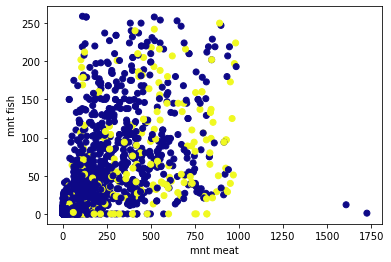

In [19]:
plt.scatter(df1.MntMeatProducts, df1.MntFishProducts, c=df1.Response, cmap='plasma')
plt.xlabel('mnt meat'); plt.ylabel('mnt fish')

Text(0, 0.5, 'mnt fish')

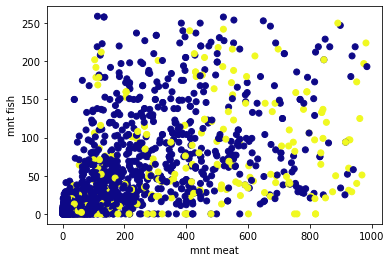

In [20]:
df1 = df1[df1.MntMeatProducts < 1100]
plt.scatter(df1.MntMeatProducts, df1.MntFishProducts, c=df1.Response, cmap='plasma')
plt.xlabel('mnt meat'); plt.ylabel('mnt fish')

Text(0, 0.5, 'mnt gold')

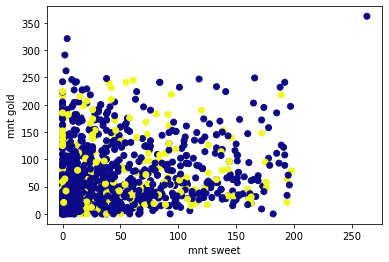

In [21]:
plt.scatter(df1.MntSweetProducts, df1.MntGoldProds, c=df1.Response, cmap='plasma')
plt.xlabel('mnt sweet'); plt.ylabel('mnt gold')

Text(0, 0.5, 'mnt gold')

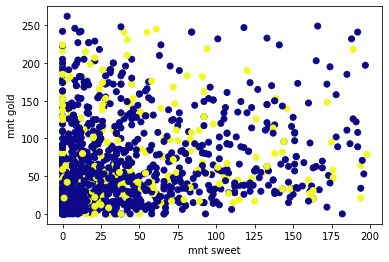

In [22]:
df1 = df1[df1.MntGoldProds < 275]
plt.scatter(df1.MntSweetProducts, df1.MntGoldProds, c=df1.Response, cmap='plasma')
plt.xlabel('mnt sweet'); plt.ylabel('mnt gold')

Text(0, 0.5, 'catalog purchase')

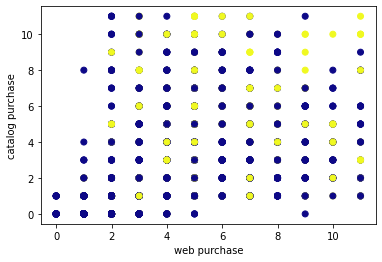

In [23]:
plt.scatter(df1.NumWebPurchases, df1.NumCatalogPurchases, c=df1.Response, cmap='plasma')
plt.xlabel('web purchase'); plt.ylabel('catalog purchase')

In [24]:
y = df1.Response
X = df1.drop(['Response'], axis=1)

getting the most suitable features

In [25]:
from sklearn.feature_selection import SelectFdr
sel = SelectFdr()
X_sel = sel.fit_transform(X, y)
X_sel.shape, X.shape

((2226, 19), (2226, 27))

In [26]:
col_index = sel.get_support()
X.columns[col_index]

Index(['Education', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'year'],
      dtype='object')

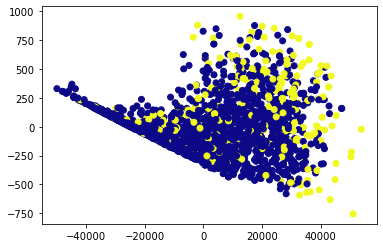

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

x_pca = pca.fit_transform(X_sel, y)
plt.scatter(x_pca[:,0],x_pca[:,1], c=y, cmap='plasma')

modelling

In [ ]:
X.columns

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sel, y, test_size=.7)

In [31]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report

gaus = GaussianNB()
ensemb = RandomForestClassifier()
neigh = KNeighborsClassifier()

models = [gaus, ensemb, neigh]

print('model:\t accuracy_score: balanced accuracy score')
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{model}:\t{accuracy_score(y_test, y_pred)},{balanced_accuracy_score(y_test,y_pred)}')

model:	 accuracy_score: balanced accuracy score
GaussianNB():	0.7684413085311097,0.6706335087672189
RandomForestClassifier():	0.868505452212957,0.6262821889852582
KNeighborsClassifier():	0.8460551635663887,0.5534105555704734


In [34]:
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)    
    print(f'{model}\n: {classification_report(y_test,y_pred)}')

GaussianNB()
:               precision    recall  f1-score   support

           0       0.91      0.81      0.86      1336
           1       0.32      0.53      0.40       223

    accuracy                           0.77      1559
   macro avg       0.61      0.67      0.63      1559
weighted avg       0.83      0.77      0.79      1559

RandomForestClassifier()
:               precision    recall  f1-score   support

           0       0.89      0.96      0.92      1336
           1       0.56      0.30      0.39       223

    accuracy                           0.87      1559
   macro avg       0.72      0.63      0.66      1559
weighted avg       0.84      0.87      0.85      1559

KNeighborsClassifier()
:               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1336
           1       0.40      0.14      0.21       223

    accuracy                           0.85      1559
   macro avg       0.63      0.55      0.56      1559
weighte

In [35]:
import pickle
pickle.dump(ensemb, open('Randomforest.pkl', 'wb'))